# Ejemplos del código de FVM de José.

In [1]:
import sys
# Windows:
# Actualizar ...
# Ubuntu: 
sys.path.append("../../pythonFVM-20201125T113536Z-001/pythonFVM/FVM/")
import FiniteVolumeMethod as fvm  # Usa numba y sólo está disponible para python 2.7 y 3.4-3.7
import numpy as np
import matplotlib.pyplot as plt

## Una dimensión

In [2]:
#-------------Definición de datos iniciales ----------------
lx = 0.5 # meters
TA = 100 # °C 
TB = 500 # °C 
k  = 10 # W/m.K
nx  = 5 # Número de fronteras (5 volumenes tienen 6 fronteras )
#-------------------------------------------------------------

In [3]:
# ------------Creamos la malla de acuerdo a la geometría definida por el problema
malla = fvm.Mesh(1)
malla.setDominio(np.array([0., 0.05, 0.1, 0.3, 0.48, 0.5]))
malla.info() # Se imprime información

     MESH INFORMATION   

Mesh type: Cartesian
Number of dimensions of mesh: 1

 ----- X-axis -----
Number of x volumnes: 4
Lenght x of problem domain: 0.5
List of x positions of volumes: 
 [0.05 0.1  0.3  0.48]
List of x positions of domain nodes: 
 [0.   0.05 0.1  0.3  0.48 0.5 ]


[0.05 0.1  0.3  0.48] [1.0] [1.0]


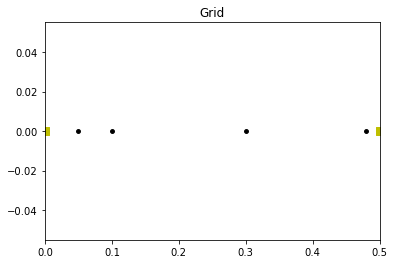

In [4]:
#-------------Definimos fronteras ----------
malla.tagWestWall('D1',TA)
malla.tagEastWall('D2',TB)
print(malla.X(),malla.Y(),malla.Z())
malla.draw()

In [5]:
#--- creamos el objeto coeficientes --------------------------
coef = fvm.Coefficients(malla)
coef.setDiffusion(k)
print("\naP es:")
print(coef.aP())
print("\naE es:")
print(coef.aE())
print("\naW es:")
print(coef.aW())


aP es:
[[[400.         250.         105.55555556 555.55555556]]]

aE es:
[[[-200.          -50.          -55.55555556 -500.        ]]]

aW es:
[[[-200.         -200.          -50.          -55.55555556]]]


In [6]:
#---- imprimimos diccionarios con los valores de cada frontera
print("Los valores Dirichlet son:")
print(malla.dirichValues() )

Los valores Dirichlet son:
{'D1': 100, 'D2': 500}


In [7]:
sistema = fvm.EqSystem(coef)
sistema.NaiveSetMatrix()
print("La matriz que representa el sistema de ecuaciones es:")
print(sistema.mat())

La matriz que representa el sistema de ecuaciones es:
[[ 400.         -200.            0.            0.        ]
 [-200.          250.          -50.            0.        ]
 [   0.          -50.          105.55555556  -55.55555556]
 [   0.            0.          -55.55555556  555.55555556]]


In [8]:
print("EL vector 'b' es:")
print(sistema.b())

EL vector 'b' es:
[ 20000.      0.      0. 250000.]


In [9]:
sol = np.linalg.solve( sistema.mat(),sistema.b() )
print("La sol es:")
print(sol)

La sol es:
[140. 180. 340. 484.]


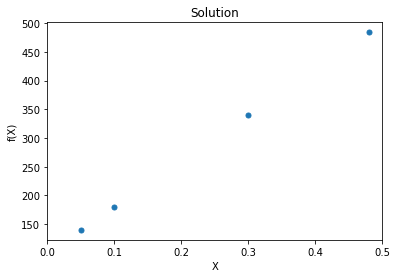

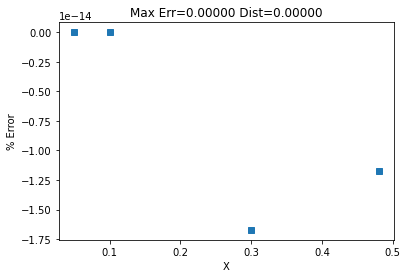

In [10]:
def analytic_sol(x,y=None,z=None):
    return 800*x+100

graficador = fvm.SolPlotr(malla)
graficador.energy(sol,analytic_sol)

---
## Una dimensión, más volúmenes. 

In [11]:
#-------------Definición de datos iniciales ----------------
lx = 0.5 # meters
TA = 100 # °C 
TB = 500 # °C 
k  = 10  # W/m.K
nx  = 200 # Número de fronteras (5 volumenes tienen 6 fronteras )
#-------------------------------------------------------------

In [12]:
# ------------Creamos la malla de acuerdo a la geometría definida por el problema
malla = fvm.Mesh(1)
malla.setDominio(np.linspace(0., 0.5, nx+1))
malla.info() # Se imprime información

     MESH INFORMATION   

Mesh type: Cartesian
Number of dimensions of mesh: 1

 ----- X-axis -----
Number of x volumnes: 199
Lenght x of problem domain: 0.5
List of x positions of volumes: 
 [0.0025 0.005  0.0075 0.01   0.0125 0.015  0.0175 0.02   0.0225 0.025
 0.0275 0.03   0.0325 0.035  0.0375 0.04   0.0425 0.045  0.0475 0.05
 0.0525 0.055  0.0575 0.06   0.0625 0.065  0.0675 0.07   0.0725 0.075
 0.0775 0.08   0.0825 0.085  0.0875 0.09   0.0925 0.095  0.0975 0.1
 0.1025 0.105  0.1075 0.11   0.1125 0.115  0.1175 0.12   0.1225 0.125
 0.1275 0.13   0.1325 0.135  0.1375 0.14   0.1425 0.145  0.1475 0.15
 0.1525 0.155  0.1575 0.16   0.1625 0.165  0.1675 0.17   0.1725 0.175
 0.1775 0.18   0.1825 0.185  0.1875 0.19   0.1925 0.195  0.1975 0.2
 0.2025 0.205  0.2075 0.21   0.2125 0.215  0.2175 0.22   0.2225 0.225
 0.2275 0.23   0.2325 0.235  0.2375 0.24   0.2425 0.245  0.2475 0.25
 0.2525 0.255  0.2575 0.26   0.2625 0.265  0.2675 0.27   0.2725 0.275
 0.2775 0.28   0.2825 0.285  0.2875 0.29   0.

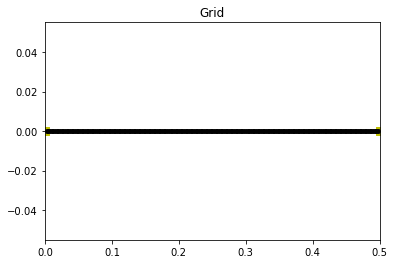

In [13]:
#-------------Definimos fronteras ----------
malla.tagWestWall('D1',TA)
malla.tagEastWall('D2',TB)
malla.draw()

In [14]:
#--- creamos el objeto coeficientes --------------------------
coef=fvm.Coefficients(malla)
coef.setDiffusion(k)
print("\naP es:")
print(coef.aP())
print("\naE es:")
print(coef.aE())
print("\naW es:")
print(coef.aW())


aP es:
[[[8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
   8000. 8000. 8000. 8000.

In [15]:
#---- imprimimos diccionarios con los valores de cada frontera
print("Los valores Dirichlet son:")
print(malla.dirichValues() )

Los valores Dirichlet son:
{'D1': 100, 'D2': 500}


In [16]:
sistema= fvm.EqSystem(coef)
sistema.NaiveSetMatrix()
print("La matriz que representa el sistema de ecuaciones es:")
print(sistema.mat())

La matriz que representa el sistema de ecuaciones es:
[[ 8000. -4000.     0. ...     0.     0.     0.]
 [-4000.  8000. -4000. ...     0.     0.     0.]
 [    0. -4000.  8000. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...  8000. -4000.     0.]
 [    0.     0.     0. ... -4000.  8000. -4000.]
 [    0.     0.     0. ...     0. -4000.  8000.]]


In [17]:
print("EL vector 'b' es:")
print(sistema.b())

EL vector 'b' es:
[ 400000.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.      

In [18]:
sol = np.linalg.solve( sistema.mat(),sistema.b() )
print("La sol es:")
print(sol)

La sol es:
[102. 104. 106. 108. 110. 112. 114. 116. 118. 120. 122. 124. 126. 128.
 130. 132. 134. 136. 138. 140. 142. 144. 146. 148. 150. 152. 154. 156.
 158. 160. 162. 164. 166. 168. 170. 172. 174. 176. 178. 180. 182. 184.
 186. 188. 190. 192. 194. 196. 198. 200. 202. 204. 206. 208. 210. 212.
 214. 216. 218. 220. 222. 224. 226. 228. 230. 232. 234. 236. 238. 240.
 242. 244. 246. 248. 250. 252. 254. 256. 258. 260. 262. 264. 266. 268.
 270. 272. 274. 276. 278. 280. 282. 284. 286. 288. 290. 292. 294. 296.
 298. 300. 302. 304. 306. 308. 310. 312. 314. 316. 318. 320. 322. 324.
 326. 328. 330. 332. 334. 336. 338. 340. 342. 344. 346. 348. 350. 352.
 354. 356. 358. 360. 362. 364. 366. 368. 370. 372. 374. 376. 378. 380.
 382. 384. 386. 388. 390. 392. 394. 396. 398. 400. 402. 404. 406. 408.
 410. 412. 414. 416. 418. 420. 422. 424. 426. 428. 430. 432. 434. 436.
 438. 440. 442. 444. 446. 448. 450. 452. 454. 456. 458. 460. 462. 464.
 466. 468. 470. 472. 474. 476. 478. 480. 482. 484. 486. 488. 490. 

In [19]:
x = np.linspace(0.,0.5,20)[1:-1]
var = -1
print(x[var])
print(sol[var])

0.47368421052631576
497.99999999999983


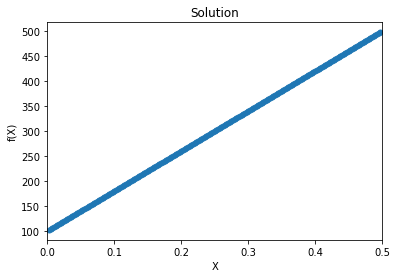

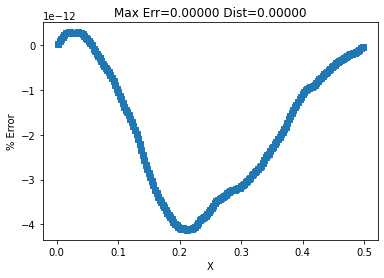

In [20]:
def analytic_sol(x,y=None,z=None):
    return 800*x+100

graficador = fvm.SolPlotr(malla)
graficador.energy(sol,analytic_sol)

---
## Dos dimensiones, pocos puntos
--Esto ya no está bien--

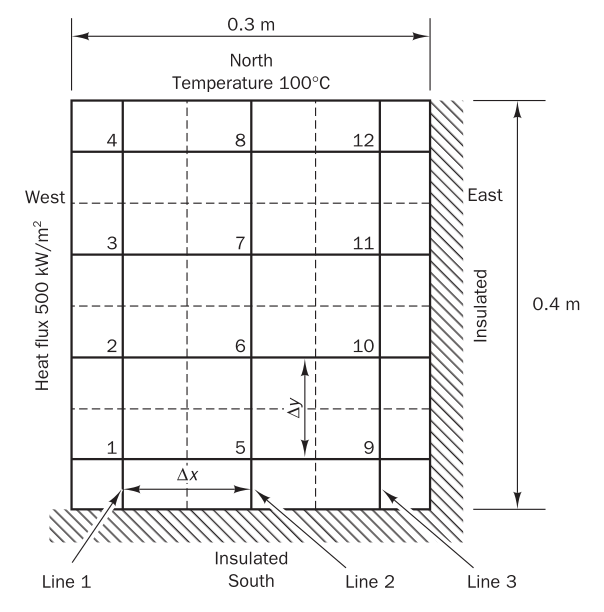

In [21]:
#-------------Definición de datos iniciales ----------------
lx = 0.3 # meters
ly = 0.4
lz = 0.01
Te = 0 # ºC
Fw = 500000 # ºC
Tn = 100 # ºC
Ts = 0 # ºC
nvx  = 3 # Número de volúmenes
nvy = 4
#-------------------------------------------------------------

In [22]:
#--------malla T -------------------------
malla = fvm.Mesh(2, volumes = (nvx, nvy), lengths = (lx, ly, lz))
malla.tagNorthWall('Nn', Tn)
malla.tagSouthWall('Ns', Ts)
malla.tagEastWall('Ne', Te)
malla.tagWestWall('Dw', Fw)
#malla._Mesh__lz = 0.01
#malla._Mesh__deltaZ = np.array([0.01, 0.01])
malla.info()

     MESH INFORMATION   

Mesh type: Cartesian
Number of dimensions of mesh: 2

 ----- X-axis -----
Number of x volumnes: 3
Lenght x of problem domain: 0.3
List of x positions of volumes: 
 [0.05 0.15 0.25]
List of x positions of domain nodes: 
 [0.   0.05 0.15 0.25 0.3 ]
----- Y-axis -----
Number of y volumnes: 4
Lenght y of problem domain: 0.4
List of y positions of volumes: 
 [0.05 0.15 0.25 0.35]
List of y positions of domain nodes: 
 [0.   0.05 0.15 0.25 0.35 0.4 ]


In [23]:
malla.__dict__

{'_Mesh__nvx': 3,
 '_Mesh__nvy': 4,
 '_Mesh__nvz': 1,
 '_Mesh__lx': 0.3,
 '_Mesh__ly': 0.4,
 '_Mesh__lz': 2.0,
 '_Mesh__X': array([0.05, 0.15, 0.25]),
 '_Mesh__Y': array([0.05, 0.15, 0.25, 0.35]),
 '_Mesh__Z': array([1.]),
 '_Mesh__dominioX': array([0.  , 0.05, 0.15, 0.25, 0.3 ]),
 '_Mesh__dominioY': array([0.  , 0.05, 0.15, 0.25, 0.35, 0.4 ]),
 '_Mesh__dominioZ': array([0., 1., 2.]),
 '_Mesh__deltaX': array([0.05, 0.1 , 0.1 , 0.05]),
 '_Mesh__deltaY': array([0.05, 0.1 , 0.1 , 0.1 , 0.05]),
 '_Mesh__deltaZ': array([1., 1.]),
 '_Mesh__coordX': None,
 '_Mesh__coordY': None,
 '_Mesh__coordZ': None,
 '_Mesh__dirichTagDict': {'Dw': 500000},
 '_Mesh__neumTagDict': {'Nn': 100, 'Ns': 0, 'Ne': 0},
 '_Mesh__sourcTagDict': {},
 '_Mesh__dim': 2,
 '_Mesh__volumes': (3, 4),
 '_Mesh__lengths': (0.3, 0.4, 0.01),
 '_Mesh__autoMesh': True,
 '_Mesh__emptyCoord': True,
 '_Mesh__pressed': False,
 '_Mesh__intWallNodes': None,
 '_Mesh__tags': ['Dw',
  'Ns',
  'Ns',
  'Ns',
  'Ne',
  'Dw',
  'Off',
  'Off',
 

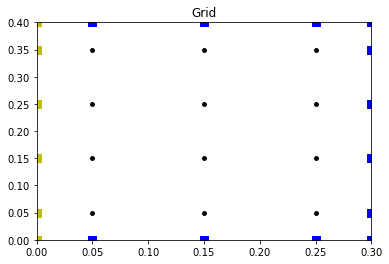

In [196]:
malla.draw()

In [197]:
#--- creamos el objeto coeficientes --------------------------
coef = fvm.Coefficients(malla)
k = 1000
coef.setDiffusion(k)
print("\naP es:")
print(coef.aP())
print("\naE es:")
print(coef.aE())
print("\naW es:")
print(coef.aW())
print("\naN es:")
print(coef.aN())
print("\naS es:")
print(coef.aS())


aP es:
[[[60. 50. 60.]
  [50. 40. 50.]
  [50. 40. 50.]
  [60. 50. 60.]]]

aE es:
[[[-10. -10. -20.]
  [-10. -10. -20.]
  [-10. -10. -20.]
  [-10. -10. -20.]]]

aW es:
[[[-20. -10. -10.]
  [-20. -10. -10.]
  [-20. -10. -10.]
  [-20. -10. -10.]]]

aN es:
[[[-10. -10. -10.]
  [-10. -10. -10.]
  [-10. -10. -10.]
  [-20. -20. -20.]]]

aS es:
[[[-20. -20. -20.]
  [-10. -10. -10.]
  [-10. -10. -10.]
  [-10. -10. -10.]]]


In [198]:
#---- imprimimos diccionarios con los valores de cada frontera
print("Los valores Dirichlet son:", malla.dirichValues())
print("Los valores Neumman son:", malla.neumValues())

Los valores Dirichlet son: {'Dw': 500000}
Los valores Neumman son: {'Nn': 100, 'Ns': 0, 'Ne': 0}


In [201]:
sistema= fvm.EqSystem(coef)
sistema.NaiveSetMatrix()
print("La matriz que representa el sistema de ecuaciones es:")
print(sistema.mat())

La matriz que representa el sistema de ecuaciones es:
[[ 20. -10.   0. -10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  10. -10.   0. -10.   0.   0.   0.   0.   0.   0.   0.]
 [  0. -10. -20.   0.   0. -10.   0.   0.   0.   0.   0.   0.]
 [-10.   0.   0.  50. -10.   0. -10.   0.   0.   0.   0.   0.]
 [  0. -10.   0. -10.  40. -10.   0. -10.   0.   0.   0.   0.]
 [  0.   0. -10.   0. -10.  10.   0.   0. -10.   0.   0.   0.]
 [  0.   0.   0. -10.   0.   0.  50. -10.   0. -10.   0.   0.]
 [  0.   0.   0.   0. -10.   0. -10.  40. -10.   0. -10.   0.]
 [  0.   0.   0.   0.   0. -10.   0. -10.  10.   0.   0. -10.]
 [  0.   0.   0.   0.   0.   0. -10.   0.   0.  20. -10.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.   0. -10.  10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.   0. -10. -20.]]


In [202]:
print("EL vector 'b' es:")
print(sistema.b())

EL vector 'b' es:
[1.00000e+07 0.00000e+00 0.00000e+00 1.00000e+07 0.00000e+00 0.00000e+00
 1.00000e+07 0.00000e+00 0.00000e+00 1.00001e+07 1.00000e+02 1.00000e+02]


In [203]:
sol = np.linalg.solve(sistema.mat(), sistema.b())
print("La solución es:")
print(sol)

La solución es:
[ 2.00000509e+06  2.00000918e+06 -9.99991860e+05  1.00000101e+06
  9.99995945e+05 -2.54573171e+01  1.00000399e+06  9.99999055e+05
 -2.95426829e+01  2.00001991e+06  2.00002582e+06 -1.00000314e+06]


In [204]:
npsol = np.array(sol).reshape(nvx, nvy)
npsol

array([[ 2.00000509e+06,  2.00000918e+06, -9.99991860e+05,
         1.00000101e+06],
       [ 9.99995945e+05, -2.54573171e+01,  1.00000399e+06,
         9.99999055e+05],
       [-2.95426829e+01,  2.00001991e+06,  2.00002582e+06,
        -1.00000314e+06]])

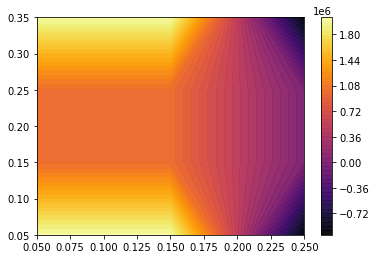

In [205]:
vis.colormap2D(malla, npsol, 'inferno')

In [63]:
graficador = fvm.SolPlotr(malla)
#graficador.energy(sol,analytic_sol)

---
## El ejemplo perro con presión y velocidades

In [64]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: jose

Reproduction of the resutls seen in the paper 
'Natural convection of air in a square cavity 
a bench mark solution' by G. De Vahl Davis

In this code a 40x40 mesh is defined and the 
Ra=1e3 case is solved.
"""
plt.close("all")
#-------------Definición de datos iniciales ----------------
lx = 1.0
ly = 1.0
Ra = 1e3
Pr = 0.71
nvx = 40 ; nvy = 40
rho =1.
# ------------Creamos la malla de acuerdo a la geometría definida por el problema---
num_iter=481

In [65]:
#--------malla T -------------------------
malla = fvm.Mesh(2, volumes=(nvx,nvy),lengths=(lx,ly) )
malla.tagNorthWall('Nn1',0.0)
malla.tagSouthWall('Ns2',0.0)
malla.tagEastWall('D1',0.)
malla.tagWestWall('D2',1.)
#malla.draw()
#---------mallla U ------------
mallaU = fvm.UMesh(malla)
mallaU.tagEastWall('D4',0.)
mallaU.tagWestWall('D5',0.)
mallaU.tagNorthWall('D6',0.)
mallaU.tagSouthWall('D7',0.)
#mallaU.draw()
#---------malla V--------------
mallaV = fvm.VMesh(malla)
mallaV.tagEastWall('D4',0.)
mallaV.tagWestWall('D5',0.)
mallaV.tagNorthWall('D6',0.)
mallaV.tagSouthWall('D7',0.)
#mallaV.draw()
#----------malla P ------------------------
mallaP = fvm.Mesh(2, volumes=(nvx,nvy),lengths=(lx,ly))
mallaP.tagEastWall('D1',0.)
mallaP.tagWestWall('D2',0.)
mallaP.tagNorthWall('D3',0.)
mallaP.tagSouthWall('D4',0.)

In [66]:
#----------Definición de P,U,V--------------------------------------
P = 1.*np.ones((1,nvy,nvx))
#-------------------------------------------------------------------------
#A,alpha = 20.,1. ; pi=np.pi
A,alpha = 2.,1. ; pi=np.pi
X=malla.uStagDef()[0]  ; Y=malla.Y() ; Z = malla.Z()
ye,zeta,equis=np.meshgrid( Y,Z,X) 
U=-A*np.cos(alpha*pi*ye/ly)*np.sin(alpha*pi*equis/lx)
X=malla.X() ; Y=malla.vStagDef()[1] ; Z = malla.Z()
ye,zeta,equis=np.meshgrid( Y,Z,X) 
V=A*np.sin(alpha*pi*ye/ly)*np.cos(alpha*pi*equis/lx) 
vel = (U,V) #---------Tener cuidado con la definicion de vel
#-------------------------------------------------------------------------
solU = U[:,:,1:-1]
solV = V[:,1:-1,]
#------------------------------

In [67]:
#     ECUACIÓN DE ENERGÍA
coefT=fvm.Coefficients(malla)
coefT.setDiffusion(1.0)
coefT.setAdvection( 1.0, (U,V),scheme='upwind1' )
sistemaT= fvm.EqSystem(coefT)
sistemaT.NaiveSetCSR()
A = sistemaT.mat()
M2 = spla.spilu(A) ; 
M = spla.LinearOperator(A.shape, M2.solve)
solT, exitCodeT = gmres( A,sistemaT.b(),M=M )
solT = np.reshape(solT,(1,nvy,nvx))    
    

graficador = fvm.SolPlotr(malla)
#graficador.energy(P)
#graficador.energyVel( solT, (solU,solV), (mallaU.X(),mallaV.Y()) )
#solT = 0*solT

/home/oscar/anaconda3/envs/tesis/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:407: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [68]:
t1=time.time()
for i in range(num_iter):
    #------------------------------
    #        ECUACIÓN DE MOMENTO
    dP_dx= (P[:,:,:-1]-P[:,:,1:]) / mallaU.dxU()
    #print("dP/dx=",dP_dx)
    dP_dy= (P[:,:-1,:]-P[:,1:,:]) / mallaV.dyV()
    #print("dP/dx=",dP_dy)
    #----------------------------------------
    U_prev = U[:,:,1:-1]
    V_prev = V[:,1:-1,]
    alpha_u=0.5
    alpha_v=0.1
    alpha_p=0.7e-3
    #------- se interpolan las velocidades para encontrar las velocidades sobre la malla original---
    U_interpol = 0.5*(U[:,:,1:] + U[:,:,:-1]) # ESTO SOLO FUNCIONA PARA MALLAS UNIFORMES
    #print("U interpolated for U mesh:",U_interpol)
    V_interpol = 0.5*(V[:,:,1:] + V[:,:,:-1]) # ESTO SOLO FUNCIONA PARA MALLAS UNIFORMES
    #print("V interpolated for U mesh:",V_interpol)

    coefU=fvm.Coefficients(mallaU)
    coefU.setDiffusion(Pr)
    coefU.setAdvection( 1.0, (U_interpol,V_interpol),scheme='upwind1' )
    coefU.setSu(dP_dx)
    coefU.under(alpha_u,U_prev)
    sistemaU= fvm.EqSystem(coefU)
    sistemaU.NaiveSetCSR()
    A = sistemaU.mat()
    M2 = spla.spilu(A) ; 
    M = spla.LinearOperator(A.shape, M2.solve)
    solU, exitCodeU = gmres( sistemaU.mat(),sistemaU.b(), M=M )
    solU = np.reshape(solU,(1,nvy,nvx-1))
    #print("La sol de U (momento) es:")
    #print(solU)   
    
    U_interpol =  0.5*(U[:,1:,:] + U[:,:-1,:]) # ESTO SOLO FUNCIONA PARA MALLAS UNIFORMES
    #print("U interpolated for V mesh:",U_interpol)
    V_interpol = 0.5*(V[:,1:,:] + V[:,:-1,:]) # ESTO SOLO FUNCIONA PARA MALLAS UNIFORMES
    #print("V interpolated for V mesh:",U_interpol)
    coefV=fvm.Coefficients(mallaV)
    coefV.setDiffusion(Pr)
    coefV.setAdvection( 1.0, (U_interpol,V_interpol),scheme='upwind1' )
    bousnsq_term = Pr*Ra*0.5*(solT[:,1:,:]+solT[:,:-1,:])
    coefV.setSu(dP_dy+bousnsq_term)
    coefV.under(alpha_v,V_prev)
    sistemaV= fvm.EqSystem(coefV)
    sistemaV.NaiveSetCSR()   
    A = sistemaV.mat()
    M2 = spla.spilu(A) ; 
    M = spla.LinearOperator(A.shape, M2.solve)
    solV, exitCodeV = gmres(sistemaV.mat(),sistemaV.b(),M=M )
    solV = np.reshape(solV,(1,nvy-1,nvx))
    #print("La sol de V (momento) es:")
    #print(solV)     
    #---------------------------------------------
    #             ECUACIÓN DE CORRECCIÓN A PRESIÓN
    #---------definición de d ------------------
    diJ=mallaU.areasX()/coefU.aP()
    diJ *= alpha_u  #for under relax
    #print("d=",d)
    dIj=mallaV.areasY() / coefV.aP()
    dIj*=alpha_v #for under relax
    
    coefP=fvm.Coefficients(mallaP)
    aE=1e-10*np.ones(malla.nvzyx())
    aE[:,:,:-1] = rho*diJ*mallaU.areasX()
    coefP.setaE(-aE)
    aW=1e-10*np.ones(malla.nvzyx())
    aW[:,:,1:] = rho*diJ*mallaU.areasX()
    coefP.setaW(-aW)
    aN=1e-10*np.ones(malla.nvzyx())
    aN[:,:-1,:] = rho*dIj*mallaV.areasY()
    coefP.setaN(-aN)
    aS=1e-10*np.ones(malla.nvzyx())
    aS[:,1:,:] = rho*dIj*mallaV.areasY()
    coefP.setaS(-aS)
    
    coefP.setaP(aE+aW+aN+aS)
    coefP.saveSu(rho*(U[:,:,:-1]-U[:,:,1:])*mallaP.areasX()+rho*(V[:,:-1,:]-V[:,1:,:])*mallaP.areasY())
    
    sistemaP= fvm.EqSystem(coefP)
    sistemaP.NaiveSetCSR()
    A = sistemaP.mat()
    M2 = spla.spilu(A) ; 
    M = spla.LinearOperator(A.shape, M2.solve)
    solP, exitCodeP = gmres( sistemaP.mat(),sistemaP.b() ,M=M )
    solP =  np.reshape(solP,(1,nvy,nvx))
    #print("La sol de P' es:",solP)
    
    P = P + alpha_p*solP
    #print("La P corregida es:",P)
    
    U[:,:,1:-1] = solU + diJ*(P[:,:,:-1]-P[:,:,1:]) 
    #print("La U corregida es:",U )

    #alpha_v = 0.6
    #V_corrected = solV + dIj*(P[:,-1:,:]-P[:,1:,:])
    #V[:,1:-1,:] = alpha_v*V_corrected +  (1.-alpha_v)*V[:,1:-1,:]
    V[:,1:-1,:] = solV + dIj*(P[:,:-1,:]-P[:,1:,:]) 
    #print("La V corregida es:",V )

    coefT=fvm.Coefficients(malla)
    coefT.setDiffusion(1.0)
    coefT.setAdvection( 1.0, (U,V),scheme='upwind1' )
    sistemaT= fvm.EqSystem(coefT)
    sistemaT.NaiveSetCSR()
    A = sistemaT.mat()
    M2 = spla.spilu(A) ; 
    M = spla.LinearOperator(A.shape, M2.solve)
    solT, exitCodeT = gmres( A,sistemaT.b(),M=M )
    solT = np.reshape(solT,(1,nvy,nvx))  
    
    if (exitCodeT+exitCodeP+exitCodeU+exitCodeV) != 0:
        print("\n===============")
        print("Salida no exitosa en iteración {}".format(i))
        print("Códigos de salida:")
        print("U:{} - V:{} - P:{} - T:{} \n".format(exitCodeU,exitCodeV,exitCodeP,exitCodeT))
        break
    
    if i%int((num_iter-1)/20)==0:
        
#        graficador.energyVel( solT, (solU,solV), (mallaU.X(),mallaV.Y()), size=15 )
        continuidad=np.abs(U[:,:,1:]-U[:,:,:-1]+V[:,1:,:]-V[:,:-1,:])
        avance= ((i+1)/num_iter)*100
        print("{:.1f}% La continuidad es: {}".format( avance ,np.amax(continuidad))  )
t2=time.time()
print("El tiempo fue de: ",t2-t1)

0.2% La continuidad es: 0.05613289089683468
5.2% La continuidad es: 0.16833412212677595
10.2% La continuidad es: 0.14491940950617352
15.2% La continuidad es: 0.06832348035988087
20.2% La continuidad es: 0.052542083587956874
25.2% La continuidad es: 0.07841250264689881
30.1% La continuidad es: 0.06515109206745272
35.1% La continuidad es: 0.03493243041170345
40.1% La continuidad es: 0.0992411470270842
45.1% La continuidad es: 0.090284800403593
50.1% La continuidad es: 0.03437396731881119
55.1% La continuidad es: 0.0888070208621492
60.1% La continuidad es: 0.10218983404472269
65.1% La continuidad es: 0.058550815087294046
70.1% La continuidad es: 0.07345194106168688
75.1% La continuidad es: 0.1360272291176386
80.0% La continuidad es: 0.09614182663192741
85.0% La continuidad es: 0.0515462426848529
90.0% La continuidad es: 0.14846745446348655
95.0% La continuidad es: 0.14133439996325017
100.0% La continuidad es: 0.04313817728368777
El tiempo fue de:  17.27188730239868



Los indices de la malla que defienen la línea donde se integra Nu son:
(io,jo,ko)=(0,1,1)
(if,jf,kf)=(0,40,1)
El número de Nusselt es:  [1.09897788]

Los indices de la malla que defienen la línea donde se integra Nu son:
(io,jo,ko)=(20,1,1)
(if,jf,kf)=(20,40,1)
El número de Nusselt es:  [1.07980998]


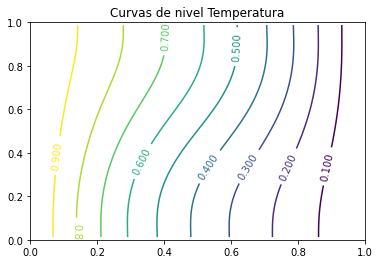

La rapidez promedio es: 1.9041762551126102


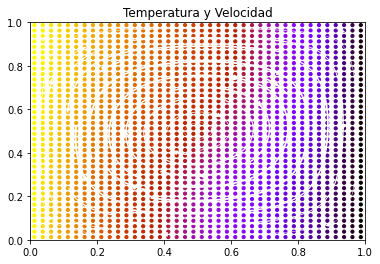

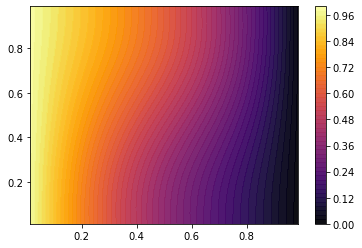

In [70]:
#--------Hacemos velocidades para número de Nusselt-------
U_extend=np.zeros( (3,nvy+2,nvx+2) ) ; V_extend=np.zeros( (3,nvy+2,nvx+2) )
U_extend[1:-1,1:-1,1:-1]=0.5*(U[:,:,1:] + U[:,:,:-1])
V_extend[1:-1,1:-1,1:-1]=0.5*(V[:,1:,:] + V[:,:-1,:])
#-------------------------------------------------------------------------

solT = np.reshape(solT,(1,nvy,nvx)) 
nu,fluxes=chk.nuLine(solT, malla, 'W', (0.0,0.0),ly=1.0,order=2)
print("El número de Nusselt es: ",nu)
nu,fluxes=chk.nuLine(solT, malla, 'Px', (0.5,0.0),ly=1.0,order=2, vel=(U_extend,V_extend))
print("El número de Nusselt es: ",nu)

#nu, nuLocals =chk.nuLine(solT, malla, 'S', (0.0,0.5),lx=1.0,order=2,vel=(U_extend,V_extend))
#print("El número de Nusselt es: ",nu)
#nu, nuLocals =chk.nuLine(solT, malla, 'Py', (0.0,0.5),lx=1.0,order=2,vel=(U_extend,V_extend))
#print("El número de Nusselt es: ",nu)

levels = np.arange(1,10)/10
graficador.Contour( solT, tieneNiv=1, niveles=levels, title="Curvas de nivel Temperatura")


graficador.energyVel( solT, (solU,solV), (mallaU.X(),mallaV.Y()), size=10, colorV="w" , 
                     marcador="o", title="Temperatura y Velocidad", barra=False)
#plt.figure()
vis.colormap2D(malla,solT,'inferno')